# Chapter 1: Introduction to Clustering

## Activity 1.01: Implementing k-means Clustering

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math
np.random.seed(0)

%matplotlib inline

## Seeds Dataset: Silhouette Score

Per the UCI Data Repository, the fields in the Seeds dataset we will be using correspond to:

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [4]:
%cd "C:\Users\jwill\Documents\Machine Learning\_PacktPub\05 ML Types\The-Unsupervised-Learning-Workshop-master\Chapter01\Exercise1.06"
seeds = pd.read_csv('Seed_Data.csv')

C:\Users\jwill\Documents\Machine Learning\_PacktPub\05 ML Types\The-Unsupervised-Learning-Workshop-master\Chapter01\Exercise1.06


In [5]:
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [6]:
X = seeds[['A','P','C','LK','WK','A_Coef','LKG']]
y = seeds['target']

In [7]:
# See what our features look like
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [8]:
## Bring back the function we created earlier

def k_means(X, K):
    # Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initialize Kcentroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [9]:
# Convert from Pandas dataframe to NumPy matrix
X_mat = X.values

In [12]:
# Four Segment Run
# Run our Seeds matrix through the k_means function we created earlier
# Create 4 segments
centroids, labels, centroids_history, labels_history = k_means(X_mat, 4)

In [13]:
# See what labels we got
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1
 3 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 3 1 1 1 2 2 2 2 0 2 0 0
 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 0 2 0 2 0 0 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2
 0 2 0 2 2 2 0 0 2 0 2 2 2 0 0 2 0 0 2 0 0 0 2 0 2]


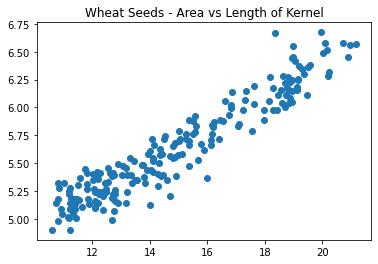

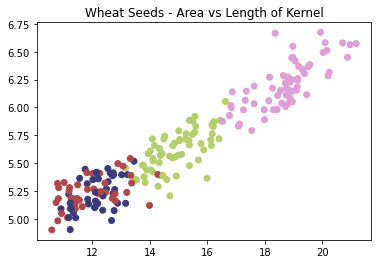

In [14]:
# See how well our implementation of K-Means did
# Scatterplot of Area and Length of Kernel
plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()
# Same scatterplot with 4 segments
plt.scatter(X['A'], X['LK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

In [15]:
# Calculate Silhouette Score for 4 Segments

silhouette_score(X[['A','LK']], labels)

0.3451783256885771

In [16]:
# Alternate Four Segment Run
# Run our Seeds matrix through the k_means function we created earlier
# Create 4 segments
centroids, labels, centroids_history, labels_history = k_means(X_mat, 4)

In [17]:
# See what labels we got
print(labels)

[0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2
 2 0 1 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 2 2 2 3
 2 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1]


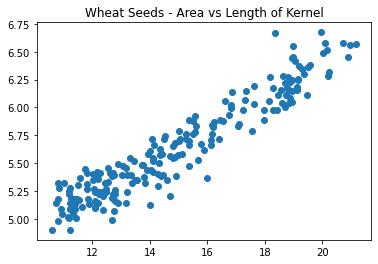

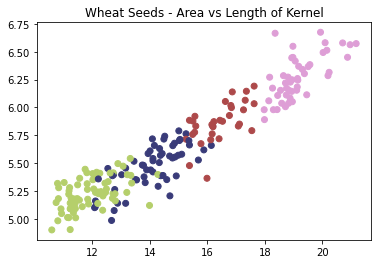

In [18]:
# See how well our implementation of K-Means did
# Scatterplot of Area and Length of Kernel
plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()
# Same scatterplot with 4 segments
plt.scatter(X['A'], X['LK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

In [19]:
# Calculate Silhouette Score for 4 Segments

silhouette_score(X[['A','LK']], labels)

0.44626069902401994

In [20]:
# Three Segment Run
# Run our Seeds matrix through the k_means function we created earlier
# Create 4 segments
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3)

In [21]:
# See what labels we got
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0
 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


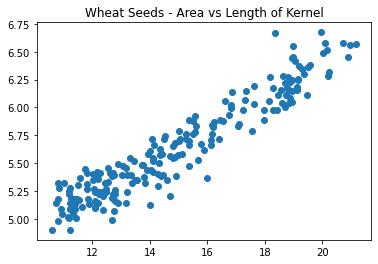

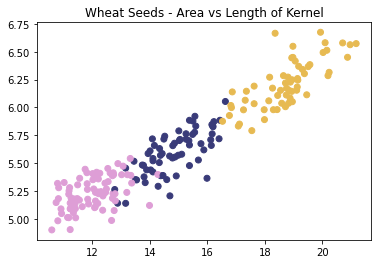

In [22]:
# See how well our implementation of K-Means did
# Scatterplot of Area and Length of Kernel
plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()
# Same scatterplot with 3 segments
plt.scatter(X['A'], X['LK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

In [23]:
# Calculate Silhouette Score for 3 Segments

silhouette_score(X[['A','LK']], labels)

0.5875704550892767

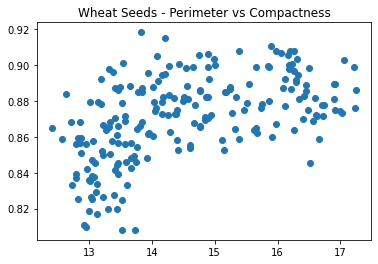

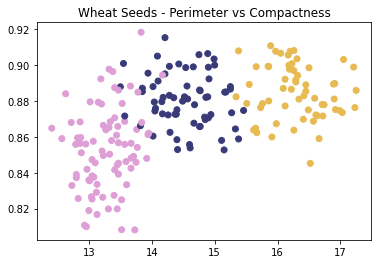

In [24]:
# See how well our implementation of K-Means did
# Scatterplot of Area and Length of Kernel
plt.scatter(X['P'], X['C'])
plt.title('Wheat Seeds - Perimeter vs Compactness')
plt.show()
# Same scatterplot with 3 segments
plt.scatter(X['P'], X['C'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Perimeter vs Compactness')
plt.show()

In [25]:
# Six Segment Run
# Run our Seeds matrix through the k_means function we created earlier
# Create 6 segments
centroids, labels, centroids_history, labels_history = k_means(X_mat, 6)

In [26]:
# See what labels we got
print(labels)

[0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 4 0 0 1 0 0 0 1 0 0 1 1 0 1 0 2 0 0 0 0 2
 2 0 4 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 2 2 2 3
 2 2 2 5 5 2 2 5 5 3 3 3 3 3 5 5 3 3 3 5 5 2 3 3 3 3 2 3 5 3 3 3 3 2 3 3 3
 3 3 5 5 3 5 3 3 3 5 3 2 3 2 5 5 3 3 2 3 3 2 2 2 2 2 0 0 2 4 4 4 4 4 4 1 4
 1 4 4 4 4 1 1 4 1 4 4 4 1 1 4 4 4 1 4 1 4 1 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4
 1 4 1 4 4 4 1 1 4 1 4 4 4 1 1 4 1 1 4 1 1 4 4 1 4]


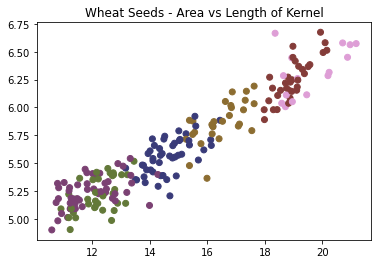

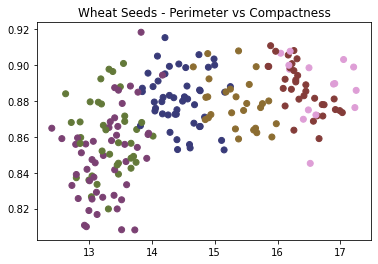

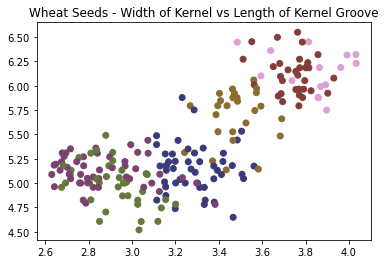

In [27]:
# Scatterplot with 6 segments
plt.scatter(X['A'], X['LK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()
# Scatterplot with different features
plt.scatter(X['P'], X['C'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Perimeter vs Compactness')
plt.show()
# Scatterplot with different features
plt.scatter(X['WK'], X['LKG'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Width of Kernel vs Length of Kernel Groove')
plt.show()

In [29]:
print("Silhouette Score for Area vs Length of Kernel")
silhouette_score(X[['A','LK']], labels)

Silhouette Score for Area vs Length of Kernel


0.15942351281950076

In [30]:
print("Silhouette Score for Perimeter vs Compactness")
silhouette_score(X[['P','C']], labels)

Silhouette Score for Perimeter vs Compactness


0.11946499113853727

In [31]:
print("Silhouette Score for Width of Kernel vs Length of Kernel Groove")
silhouette_score(X[['WK','LKG']], labels)

Silhouette Score for Width of Kernel vs Length of Kernel Groove


0.10631855867559284

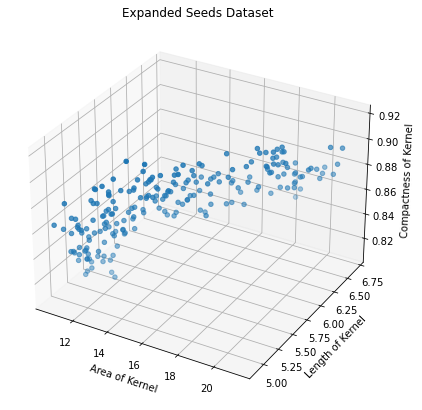

In [35]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') # Where Axes3D is required
ax.scatter(X['A'], X['LK'], X['C'])
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')
plt.show()

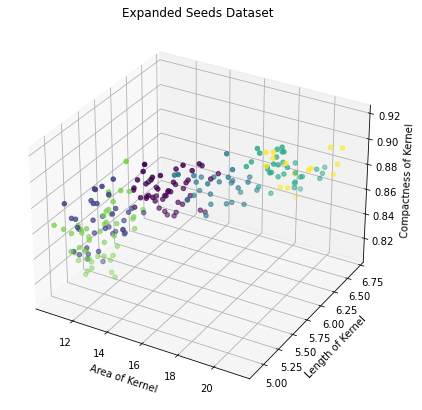

In [36]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') # Where Axes3D is required
ax.scatter(X['A'], X['LK'], X['C'], c=labels)
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')
plt.show()